In [1]:
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import pandas as pd
import random

## Unzip file

In [44]:
# Unzip file
with zipfile.ZipFile('fire_nrt_V1_96617.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

## Read Data

In [2]:
fire_data = pd.read_csv('data/fire_nrt_V1_96617.csv')
latitude = fire_data['latitude']
longitude = fire_data['longitude']

In [3]:
# Subsampling Data: Randomly select 25% of the data
subsample_per = 0.25
cur_len = len(longitude)
subsample_idx = random.sample(range(cur_len), int(cur_len*subsample_per))
long_subsample = np.take(longitude, subsample_idx)
lat_subsample = np.take(latitude, subsample_idx)

## Question 1

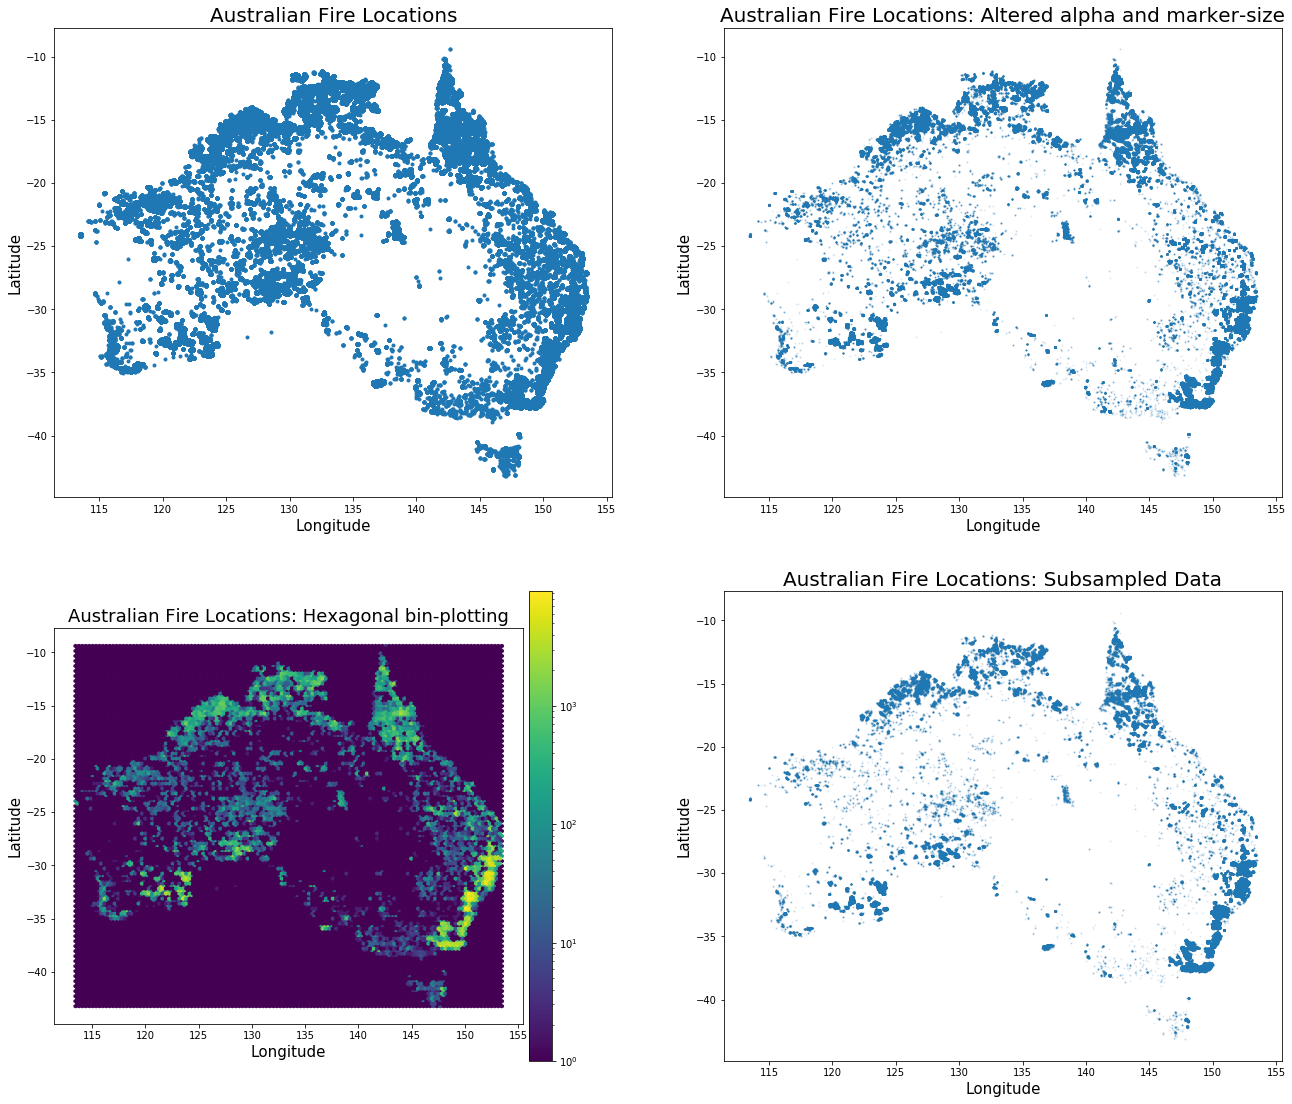

In [77]:
fig, ax = plt.subplots(2,2, figsize=(22,19))
ax1, ax2, ax3, ax4 = ax.ravel()

ax1.plot(longitude, latitude, '.')
ax1.set_xlabel('Longitude', fontsize=15)
ax1.set_ylabel('Latitude', fontsize=15)
ax1.set_title('Australian Fire Locations', fontsize=20)

ax2.plot(longitude, latitude, '.', markersize='2', alpha=0.10)
ax2.set_xlabel('Longitude', fontsize=15)
ax2.set_ylabel('Latitude', fontsize=15)
ax2.set_title('Australian Fire Locations: Altered alpha and marker-size', fontsize=20)

hb = ax3.hexbin(longitude, latitude, bins='log', gridsize=125)
ax3.set_xlabel('Longitude', fontsize=15)
ax3.set_ylabel('Latitude', fontsize=15)
ax3.set_title('Australian Fire Locations: Hexagonal bin-plotting', fontsize=18)
fig.colorbar(hb, ax=ax3,pad=0.01)
ax3.set_aspect('equal')

ax4.plot(long_subsample, lat_subsample, '.', markersize=2, alpha=0.10)
ax4.set_xlabel('Longitude', fontsize=15)
ax4.set_ylabel('Latitude', fontsize=15)
ax4.set_title('Australian Fire Locations: Subsampled Data', fontsize=20)

plt.show()

# In what areas are the most anomolies located?

Based on the density plots shown above, majority of the fires are located along the top, bottom right, and bottom left coasts (borders with the ocean) of the country. Specifically, these fall into latitude and longiude ranges of approximatley -18 to -7 (latitude) and 125-147 (longitude) for the top coast of the country, -38 to -30 (latitude) and 147 to 153 (longitude) for the bottom right coast of the country, and -33 to -25 (latitude) and 122 to 132 (longitude) for the bottom left coast of the country. These regions show the greatest density of plotted pixels/values, indicating the locations of the great number of anaomolies/measurements.

## Question 2

In [5]:
brightness = fire_data['bright_ti4']

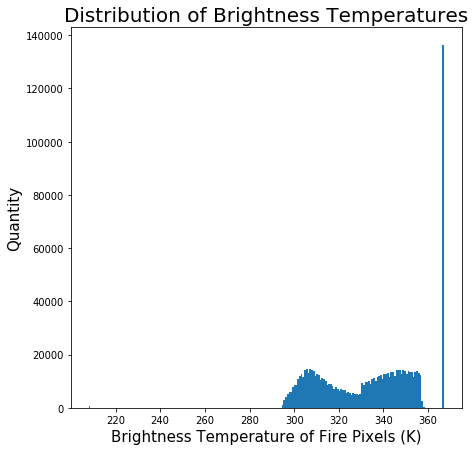

In [6]:
# Add appropriate settings to the data
fig, ax = plt.subplots(figsize=(7,7))
n, bins, _ = ax.hist(brightness, bins='auto')
ax.set_xlabel('Brightness Temperature of Fire Pixels (K)', fontsize=15)
ax.set_ylabel('Quantity', fontsize=15)
ax.set_title('Distribution of Brightness Temperatures', fontsize=20)
plt.show()

In [7]:
# All indexes which have atleast one value
subset = [idx for (idx, val) in enumerate(n) if val != 0]
subset_vals = bins[subset]
subset_vals_last_point = subset_vals[-1]

# Separate data based on the last bin 
saturated = fire_data.loc[fire_data['bright_ti4'] >= subset_vals_last_point]
non_saturated = fire_data.loc[fire_data['bright_ti4'] < subset_vals_last_point]

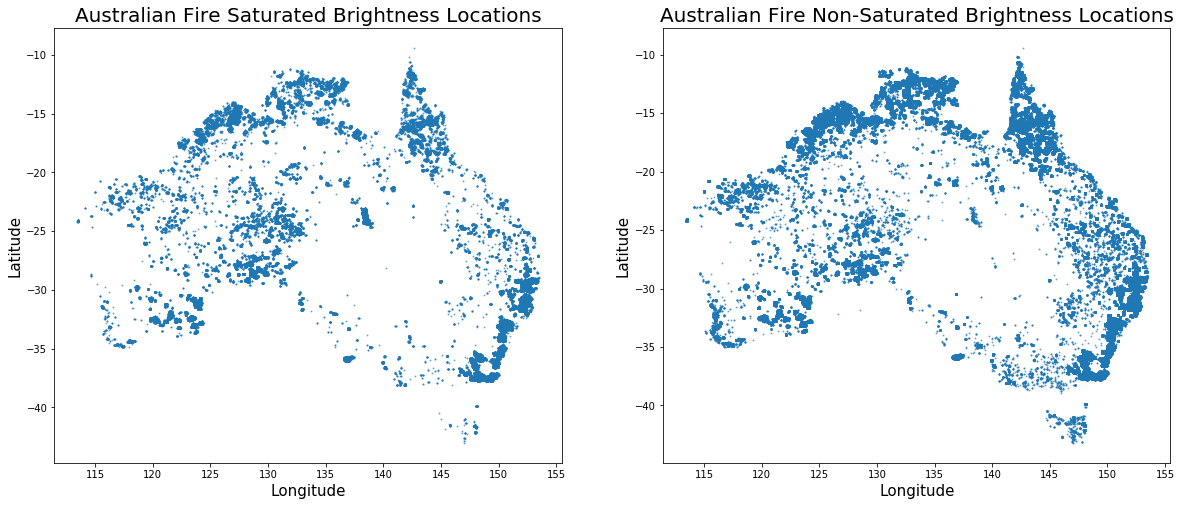

In [8]:
# Plotting saturated and non-saturated
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax1, ax2 = ax.ravel()
ax1.plot(saturated['longitude'], saturated['latitude'], '.', markersize=2, alpha=0.5)
ax1.set_xlabel('Longitude', fontsize=15)
ax1.set_ylabel('Latitude', fontsize=15)
ax1.set_title('Australian Fire Saturated Brightness Locations', fontsize=20)

ax2.plot(non_saturated['longitude'], non_saturated['latitude'], '.', markersize=2, alpha=0.5)
ax2.set_xlabel('Longitude', fontsize=15)
ax2.set_ylabel('Latitude', fontsize=15)
ax2.set_title('Australian Fire Non-Saturated Brightness Locations', fontsize=20)

plt.show()

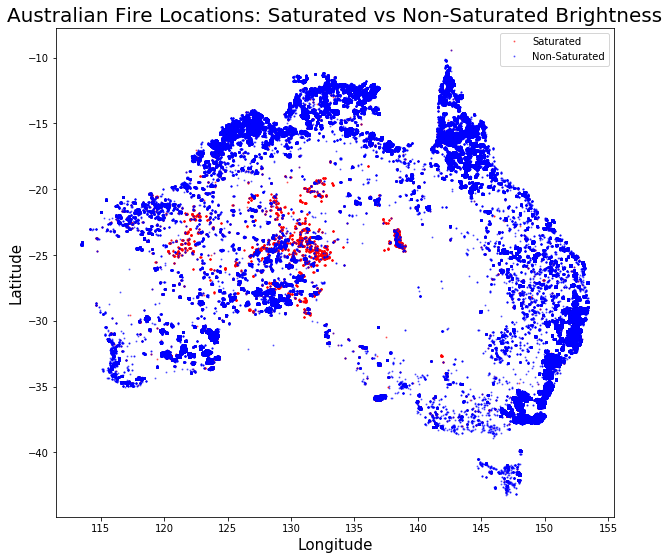

In [9]:
#Plotting values on top of each other 
fig, ax = plt.subplots(1,1, figsize=(10,9))
ax.plot(saturated['longitude'], saturated['latitude'], 'r.', markersize=2, alpha=0.5)
output = ax.plot(non_saturated['longitude'], non_saturated['latitude'], 'b.', markersize=2, alpha=0.5)
ax.legend(['Saturated', 'Non-Saturated'], loc='upper right')
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)
ax.set_title('Australian Fire Locations: Saturated vs Non-Saturated Brightness', fontsize=20)
plt.show()

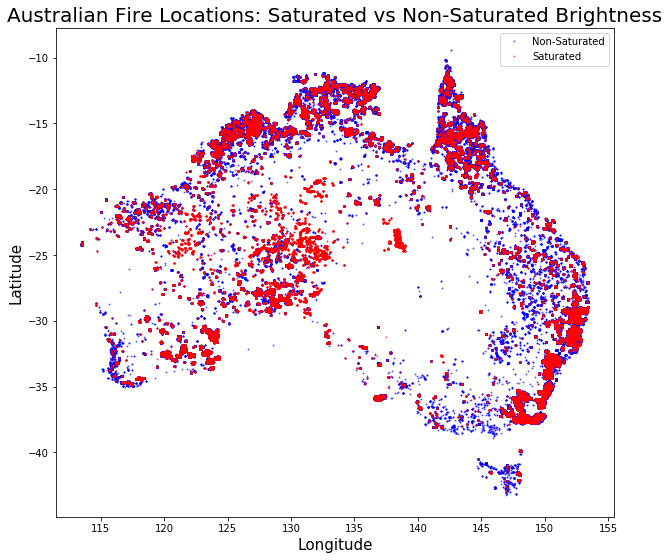

In [54]:
fig, ax = plt.subplots(1,1, figsize=(10,9))
ax.plot(non_saturated['longitude'], non_saturated['latitude'], 'b.', markersize=2, alpha=0.5)
ax.plot(saturated['longitude'], saturated['latitude'], 'r.', markersize=2, alpha=0.5)
ax.legend(['Non-Saturated', 'Saturated'], loc='upper right')
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)
ax.set_title('Australian Fire Locations: Saturated vs Non-Saturated Brightness', fontsize=20)
plt.show()

Plotting the saturated brightness locations first results in the locations being completley hidden by the non-saturated brightness locations. In contrast, when the order is reversed (i.e. the non-saturated brightness locations are plotted first), one can still see the locations of the saturated brightness locations (see figure directly above). This is likely because the number of points in the saturated class is significantly less than the number of points in the non-saturated class. More importantly, the points in the saturated class are surrounded by the points in the non-saturated class and in close proximity to the saturated class data points. Because of this, plotting the saturated class first results in the data points being hidden by the non-saturated class points while the reverse allows them to be visible.

## Presenting the data in another way

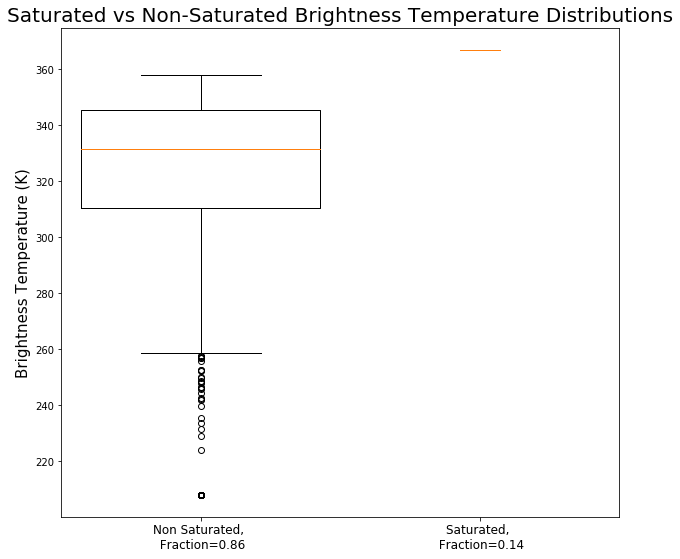

In [37]:
fig, ax = plt.subplots(1,1, figsize=(10,9))
data = [non_saturated['bright_ti4'], saturated['bright_ti4']]
len_sat = len(saturated['bright_ti4'])
len_non_sat = len(non_saturated['bright_ti4'])
total_len = len_sat + len_non_sat
widths = [len_non_sat/(len_sat+len_non_sat), len_sat/(len_sat+len_non_sat)]  

ax.boxplot(data, widths=widths)
ax.set_xticklabels([f'Non Saturated, \n Fraction={round(len_non_sat/total_len, 2)}', f'Saturated, \n Fraction={round(len_sat/total_len, 2)}'], fontsize=12)
ax.set_ylabel('Brightness Temperature (K)', fontsize=15)
ax.set_title('Saturated vs Non-Saturated Brightness Temperature Distributions',fontsize=20)
plt.show()

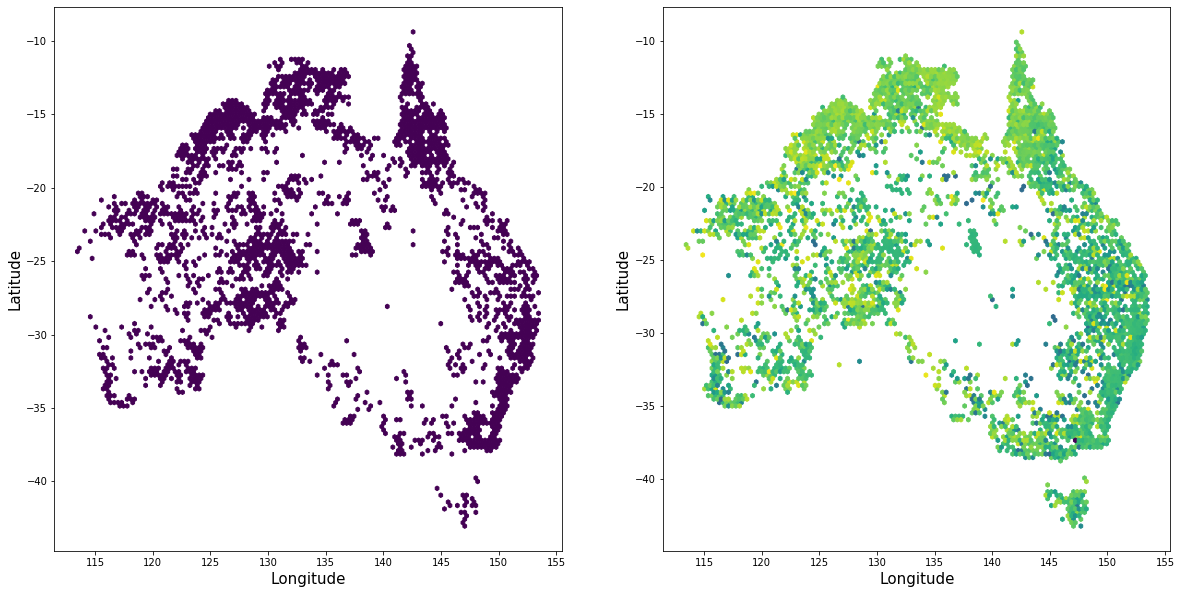

In [60]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax1, ax2 = ax.ravel()

ax1.hexbin(saturated['longitude'], saturated['latitude'],C=saturated['bright_ti4'], bins='log', gridsize=125)
ax1.set_xlabel('Longitude', fontsize=15)
ax1.set_ylabel('Latitude', fontsize=15)

ax2.hexbin(non_saturated['longitude'], non_saturated['latitude'],C=non_saturated['bright_ti4'], bins='log', gridsize=125)
ax2.set_xlabel('Longitude', fontsize=15)
ax2.set_ylabel('Latitude', fontsize=15)

plt.show()